<center><h1>Train Data Wrangler</h1></center>

<b>Introduction: </b>The Titanic sinking was one of the most infamous accidents in human history. A lot of passengers lost their lives. In this analysis we are going to formulate an hypothesis for describe who profiles were most susceptibles to live.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read CSV file and look its columns and rows
df_train = pd.read_csv('train.csv')
print(df_train.shape)

(891, 12)


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Hypothesis: </b>When the Titanic sank and people realized that lifeboats were too few for all passengers, they imposed some preferences for people who can survive, taking into account first the class (Pclass), on second place they would probably prefer a child before an adult (Age), thirdly they would probably prefer women before men (Sex) and the last condition of preference perhaps is that alone passengers survived more than the accompanied passengers (SibSp)(Parch) Probably because the accompanied passengers gave their place in a lifeboat to any member of their family. This is my hypothesis in this analysis, but what does the data tell us? We will find out.
<br>
<br><b>Note 1: </b> Is important to verify that the fare paid is related with the passengers class. If the relation exists, then we can drop fare column, because it won't represent any relevant information for us.
<br><b>Note 2: </b> Probably the embarked place has an important roll on people culture, so we need to analyze if passengers who arrived on a specific embarked place were more susceptibles to gave their places on lifeboats.
<br><b>Note 3: </b> Personally, I don't think that exists a difference on our prediction with passengers who traveled accompanied for sister or brothers and passengers who traveled with parents or soons. Because these cases could be resume on a sex roll situation. Men gave their places to women. So based on this supposed we can join SibSp and Parch columns on one FamMem (Family Members) column.
<br><b>Note 4: </b> Before send the train_master_table to visualization stage, we must consider whether the ages should be shown as they are represented originally, or shown separeted on groups like children, adults and the elderly.

<br>According with this hyphotesis, which columns are important for our prediction model?
    1. Passengerld         (Y)
    2. Survived            (Y)
    3. Pclass              (Y)
    4. Name                (N)
    5. Sex                 (Y)
    6. Age                 (Y)
    7. SibSp               (P)
    8. Parch               (P)
    9. Ticket              (N)
    10. Fare               (P)
    11. Cabin              (N)
    12. Embarked           (P)

In [4]:
# Identify where are the NaN data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# We need to drop non relevant columns and the NaN data
df_train.drop(['Name', 'Ticket', 'Cabin'], axis = 'columns',inplace = True)
df_train.dropna(subset=['Age'],inplace = True)
df_train.dropna(subset=['Embarked'],inplace = True)
print(df_train.shape)

(712, 9)


In [6]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<br><b>Solving Note 1</b>

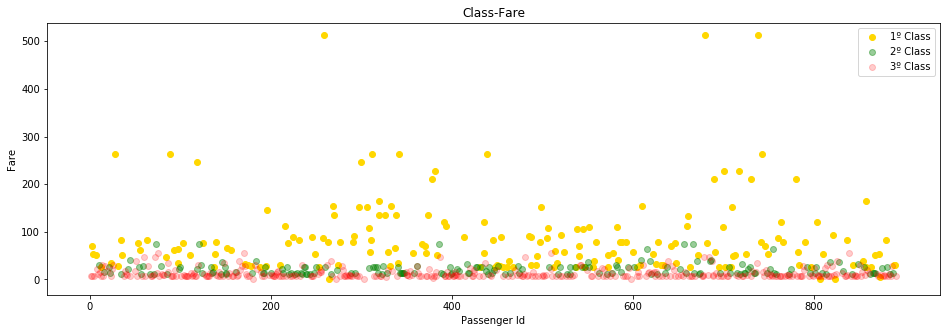

In [8]:
# Relation class-fare
plt.figure(figsize=(16, 5))

# Fares paid for 1º Class
x1_class = df_train[df_train['Pclass']==1]['PassengerId']
y1_class = df_train[df_train['Pclass']==1]['Fare']
plt.scatter(x1_class, y1_class, color='gold', label='1º Class')

# Fares paid for 2º Class
x2_class = df_train[df_train['Pclass']==2]['PassengerId']
y2_class = df_train[df_train['Pclass']==2]['Fare']
plt.scatter(x2_class, y2_class, color='green', label='2º Class', alpha=0.4)

# Fares paid for 3º Class
x3_class = df_train[df_train['Pclass']==3]['PassengerId']
y3_class = df_train[df_train['Pclass']==3]['Fare']
plt.scatter(x3_class, y3_class, color='red', label='3º Class', alpha=0.2)

plt.title('Class-Fare')
plt.ylabel('Fare')
plt.xlabel('Passenger Id')

plt.legend(loc='best')
plt.show()

We look on this scatter map that class-fare relation isn't precise. There were first class passengers who paid THE SAME AS passengers on second and third class. This case is the same for the other classes; the fare paid doesn't define the passengers class. This is a problem, because we can't drop Fare column easily. So now, we need to analyze if first class passengers who paid a little fare had upper preference than passengers of second or third class who paid the same fare. If it posibility is true we can drop Fare column based on fact that class was most important to give a place on a lifeboats than the paid fare. But if preference was the same for the three classes, it will approve that the fare paid was most important than passengers class, so we need to add Fare column on our further analysis. 

In [9]:
# We define the top fare of our subset with the most expensive fare paid for a third class place
df_train[df_train['Pclass']==3]['Fare'].max()

56.4958

In [10]:
# And bottom fare with the cheapest fare paid for a second class place
df_train[df_train['Pclass']==2]['Fare'].min()

10.5

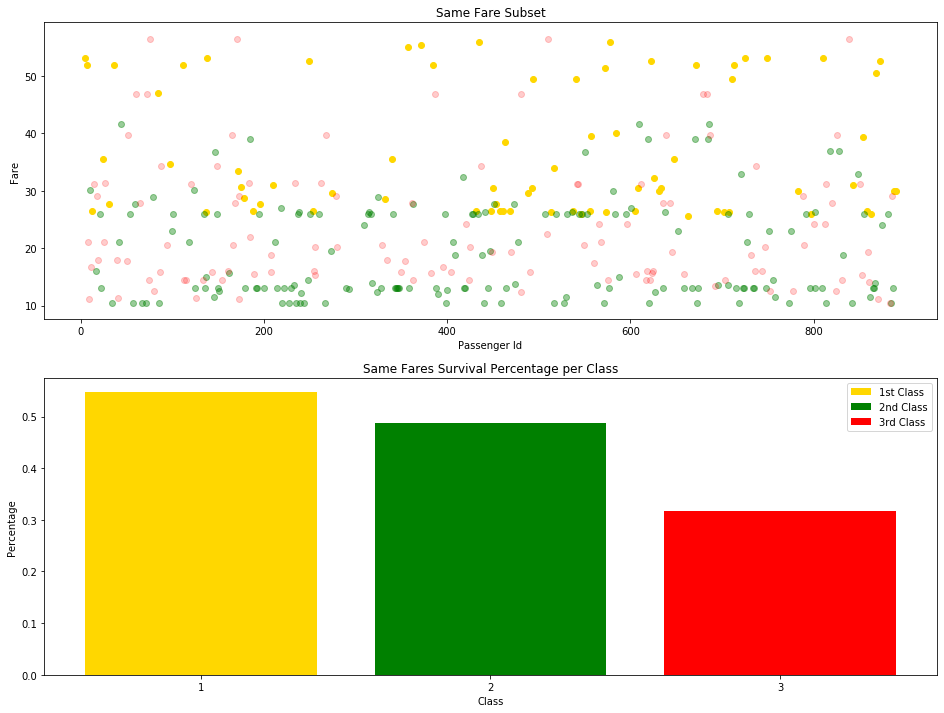

First class survival percentage: 0.55
Second class survival percentage: 0.49
Third class survival percentage: 0.32


In [11]:
# Same Fares Survived Percentage per Class
plt.figure(figsize=(16, 12))

# Fares paid for 1º Class
x1_class = df_train[(df_train['Pclass']==1) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)]['PassengerId']
y1_class = df_train[(df_train['Pclass']==1) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)]['Fare']

# Fares paid for 2º Class
x2_class = df_train[(df_train['Pclass']==2) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)]['PassengerId']
y2_class = df_train[(df_train['Pclass']==2) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)]['Fare']

# Fares paid for 3º Class
x3_class = df_train[(df_train['Pclass']==3) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)]['PassengerId']
y3_class = df_train[(df_train['Pclass']==3) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)]['Fare']



# Survival Percentage for 1º Class
total_sub1 = df_train[(df_train['Pclass']==1) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)].count()[0]
surv_sub1 = df_train[(df_train['Pclass']==1) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5) & (df_train['Survived']==1)].count()[0]
y1_class_sub = surv_sub1/total_sub1

# Survival Percentage for 2º Class
total_sub2 = df_train[(df_train['Pclass']==2) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)].count()[0]
surv_sub2 = df_train[(df_train['Pclass']==2) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5) & (df_train['Survived']==1)].count()[0]
y2_class_sub = surv_sub2/total_sub2

# Survival Percentage for 3º Class
total_sub3 = df_train[(df_train['Pclass']==3) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5)].count()[0]
surv_sub3 = df_train[(df_train['Pclass']==3) & (df_train['Fare']<=56.4958) & (df_train['Fare']>=10.5) & (df_train['Survived']==1)].count()[0]
y3_class_sub = surv_sub3/total_sub3


# Scatter map with Subset Data
plt.subplot(2, 1, 1)
plt.scatter(x1_class, y1_class, color='gold', label='1º Class')
plt.scatter(x2_class, y2_class, color='green', label='2º Class', alpha=0.4)
plt.scatter(x3_class, y3_class, color='red', label='3º Class', alpha=0.2)
plt.title('Same Fare Subset')
plt.ylabel('Fare')
plt.xlabel('Passenger Id')


# Bar graph with Survival Percentage
plt.subplot(2, 1, 2)
plt.bar(['1'], y1_class_sub, label='1st Class', color='gold')
plt.bar(['2'], y2_class_sub, label='2nd Class', color='green')
plt.bar(['3'], y3_class_sub, label='3rd Class', color='red')

plt.title('Same Fares Survival Percentage per Class')
plt.ylabel('Percentage')
plt.xlabel('Class')


plt.legend(loc='best')
plt.show()

print(f'First class survival percentage: {round(y1_class_sub,2)}')
print(f'Second class survival percentage: {round(y2_class_sub,2)}')
print(f'Third class survival percentage: {round(y3_class_sub,2)}')

This graph show us the evident preference according the passengers class. Then it shows that no matter the fee paid if not the passenger class for has more chances to survive.

In [12]:
# Then we can drop Fare column quietly
df_train.drop(['Fare'], axis = 'columns',inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


<br><b>Solving Note 2</b>

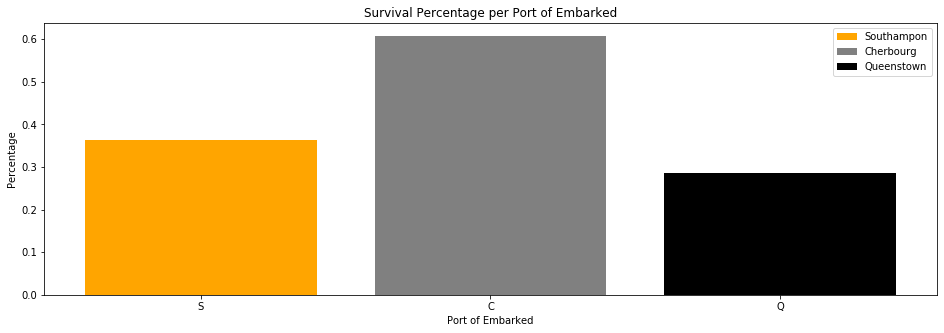

Southampon survival percentage: 0.36
Cherbourg survival percentage: 0.61
Queenstown survival percentage: 0.29


In [13]:
# At first we can create a bar graph with each survival percentage per embarked place
plt.figure(figsize=(16, 5))

# Survival Percentage of Southampon Port Embarked
y2_total_s = df_train[df_train['Embarked']=='S'].count()[0]
y2_surv_s = df_train[(df_train['Survived']==1) & (df_train['Embarked']=='S')].count()[0]
y2_per_s = y2_surv_s/y2_total_s

# Survival Percentage of Cherbourg Port Embarked
y2_total_c = df_train[df_train['Embarked']=='C'].count()[0]
y2_surv_c = df_train[(df_train['Survived']==1) & (df_train['Embarked']=='C')].count()[0]
y2_per_c = y2_surv_c/y2_total_c

# Survival Percentage of Queenstown Port Embarked
y2_total_q = df_train[df_train['Embarked']=='Q'].count()[0]
y2_surv_q = df_train[(df_train['Survived']==1) & (df_train['Embarked']=='Q')].count()[0]
y2_per_q = y2_surv_q/y2_total_q


plt.bar(['S'], y2_per_s, label='Southampon', color='orange')
plt.bar(['C'], y2_per_c, label='Cherbourg', color='gray')
plt.bar(['Q'], y2_per_q, label='Queenstown', color='k')

plt.title('Survival Percentage per Port of Embarked')
plt.ylabel('Percentage')
plt.xlabel('Port of Embarked')

plt.legend(loc='best')
plt.show()

print(f'Southampon survival percentage: {round(y2_per_s,2)}')
print(f'Cherbourg survival percentage: {round(y2_per_c,2)}')
print(f'Queenstown survival percentage: {round(y2_per_q,2)}')

Survival percentages aren't similar on our dataset. It represent that we need to analyze depplier the reason from this percentages are different. Maybe because in Cherbroug Port embarked more women than the other ports, other cause could be the number of passenger of first class in each port and other possibility could be that in Cherbourg Port embarked more childs.

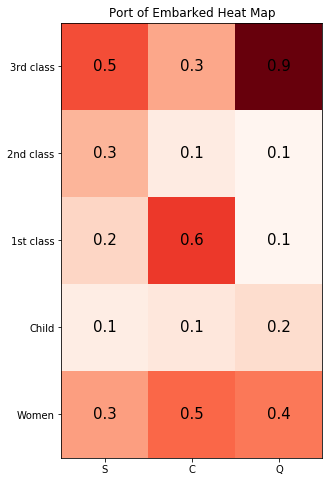

In [14]:
# Total Passengers per Port of Embarked
total_pass_S = df_train[df_train['Embarked']=='S'].count()[0]
total_pass_C = df_train[df_train['Embarked']=='C'].count()[0]
total_pass_Q = df_train[df_train['Embarked']=='Q'].count()[0]

# Women Percentage per Port of Embarked
total_women_S = df_train[(df_train['Embarked']=='S') & (df_train['Sex']=='female')].count()[0]
women_per_S = total_women_S/total_pass_S
total_women_C = df_train[(df_train['Embarked']=='C') & (df_train['Sex']=='female')].count()[0]
women_per_C = total_women_C/total_pass_C
total_women_Q = df_train[(df_train['Embarked']=='Q') & (df_train['Sex']=='female')].count()[0]
women_per_Q = total_women_Q/total_pass_Q

# Child Percentage per Port of Embarked
total_child_S = df_train[(df_train['Embarked']=='S') & (df_train['Age']<=15)].count()[0]
child_per_S = total_child_S/total_pass_S
total_child_C = df_train[(df_train['Embarked']=='C') & (df_train['Age']<=15)].count()[0]
child_per_C = total_child_C/total_pass_C
total_child_Q = df_train[(df_train['Embarked']=='Q') & (df_train['Age']<=15)].count()[0]
child_per_Q = total_child_Q/total_pass_Q

# First Class Percentage per Port of Embarked
total_1class_S = df_train[(df_train['Embarked']=='S') & (df_train['Pclass']==1)].count()[0]
class1_per_S = total_1class_S/total_pass_S
total_1class_C = df_train[(df_train['Embarked']=='C') & (df_train['Pclass']==1)].count()[0]
class1_per_C = total_1class_C/total_pass_C
total_1class_Q = df_train[(df_train['Embarked']=='Q') & (df_train['Pclass']==1)].count()[0]
class1_per_Q = total_1class_Q/total_pass_Q

# Second Class Percentage per Port of Embarked
total_2class_S = df_train[(df_train['Embarked']=='S') & (df_train['Pclass']==2)].count()[0]
class2_per_S = total_2class_S/total_pass_S
total_2class_C = df_train[(df_train['Embarked']=='C') & (df_train['Pclass']==2)].count()[0]
class2_per_C = total_2class_C/total_pass_C
total_2class_Q = df_train[(df_train['Embarked']=='Q') & (df_train['Pclass']==2)].count()[0]
class2_per_Q = total_2class_Q/total_pass_Q

# Third Class Percentage per Port of Embarked
total_3class_S = df_train[(df_train['Embarked']=='S') & (df_train['Pclass']==3)].count()[0]
class3_per_S = total_3class_S/total_pass_S
total_3class_C = df_train[(df_train['Embarked']=='C') & (df_train['Pclass']==3)].count()[0]
class3_per_C = total_3class_C/total_pass_C
total_3class_Q = df_train[(df_train['Embarked']=='Q') & (df_train['Pclass']==3)].count()[0]
class3_per_Q = total_3class_Q/total_pass_Q

# Array design for our heat map
embarked = ['S', 'C', 'Q']
clasifications = ['3rd class', '2nd class', '1st class', 'Child', 'Women'] 

percentage = np.array([[class3_per_S , class3_per_C , class3_per_Q],
                       [class2_per_S , class2_per_C , class2_per_Q],
                       [class1_per_S , class1_per_C , class1_per_Q],
                       [child_per_S , child_per_C , child_per_Q],
                       [women_per_S , women_per_C , women_per_Q]])

# Heat map configuration
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(percentage, cmap="Reds")

ax.set_xticks(np.arange(len(embarked)))
ax.set_xticklabels(embarked)
ax.set_yticks(np.arange(len(clasifications)))
ax.set_yticklabels(clasifications)

# Loop over data dimensions and create text annotations.
for i in range(len(clasifications)):
    for j in range(len(embarked)):
        text = ax.text(j, i, round(percentage[i, j], 1),
                       ha="center", va="center", color="k", size=15)
        
ax.set_title('Port of Embarked Heat Map')
plt.show()

On this heat map we can view many important things who help us to explain the high survival percentage from Cherbroug Port and the lower survival rate from Queenstown.
    1. Cherbroug has highest women percentage, although it isn't much higher than the other percentages.
    2. Cherbroug has 0.6 percent of 1st class passengers far above Southampon and Queenstown.
    3. Queenstown has 0.9 percent of 3rd class passengers, so it may explain its lower survival rate
These asseverations explain clearily the survival percentages for Cherbroug and Queenstown, but what about Southampon? Southampon Port has a half of its passengers on 3rd class and has lower women rate, so why has upper survival rate than Queenstown? It could generate many assumptions about this case, so finally I decided add this column on our final dataset, because the culture factor for each port of embarked cannot be measured properly.

<br><b>Solving Note 3</b>

In [15]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [16]:
# Join SibSp and Parch columns on FamMem column
df_train['FamMem'] = df_train[['SibSp', 'Parch']].sum(axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamMem
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,1
2,3,1,3,female,26.0,0,0,S,0
3,4,1,1,female,35.0,1,0,S,1
4,5,0,3,male,35.0,0,0,S,0


In [17]:
# Now we can drop SibSp and Parch columns
df_train.drop(['SibSp', 'Parch'], axis = 'columns',inplace = True)

In [18]:
df_train[0:10]

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamMem
0,1,0,3,male,22.0,S,1
1,2,1,1,female,38.0,C,1
2,3,1,3,female,26.0,S,0
3,4,1,1,female,35.0,S,1
4,5,0,3,male,35.0,S,0
6,7,0,1,male,54.0,S,0
7,8,0,3,male,2.0,S,4
8,9,1,3,female,27.0,S,2
9,10,1,2,female,14.0,C,1
10,11,1,3,female,4.0,S,2


In [19]:
# Finally we must to unify the type of data on our dataset
def define_sex(x):
    '''
    Male == 0
    Female == 1
    '''
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
    else:
        None

def define_embarked(x):
    '''
    Southampon == 0
    Cherbroug == 1
    Queenstown == 2
    '''
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        None
        
df_train['Sex'] = df_train['Sex'].apply(lambda x : define_sex(x))
df_train['Embarked'] = df_train['Embarked'].apply(lambda x : define_embarked(x))

In [20]:
df_train[0:10]

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamMem
0,1,0,3,0,22.0,0,1
1,2,1,1,1,38.0,1,1
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,0,1
4,5,0,3,0,35.0,0,0
6,7,0,1,0,54.0,0,0
7,8,0,3,0,2.0,0,4
8,9,1,3,1,27.0,0,2
9,10,1,2,1,14.0,1,1
10,11,1,3,1,4.0,0,2


<br><b>Solving Note 4</b>

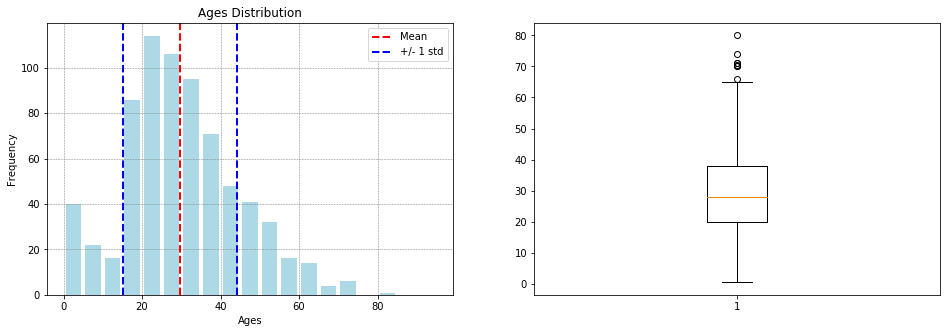

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Now, we need an histogram for describe our dataset ages
ages = np.array(df_train['Age'])
bins = list(range(0,100, 5))

# Histogram configuration
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
plt.hist(ages, bins, histtype='bar', rwidth=0.8, color='lightblue')
plt.grid(True, linewidth=0.5, linestyle='--', color='gray')
plt.axvline(ages.mean(), color='r', linestyle='--', linewidth=2, label='Mean')
plt.axvline(ages.mean() + ages.std(), color='b', linestyle='--', linewidth=2, label='+/- 1 std')
plt.axvline(ages.mean() - ages.std(), color='b', linestyle='--', linewidth=2)

plt.title('Ages Distribution')
plt.ylabel('Frequency')
plt.xlabel('Ages')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.boxplot(x = ages)

plt.show()

df_train['Age'].describe()

Note that our frequencys are evenly distributed with some outliers. Return our hypothesis, we argumented that probably children have more chances to survive than adults, but we didn't talk about the elders. Maybe elders survival rate is still lower than adults rate. The question is how we can group this ages properly. As proposal we are going to analyze the survival rate for three ages group according to ranges 0 to 15 years (Children), 16 to 60 years (Adults) and 61+ years (Elders). 

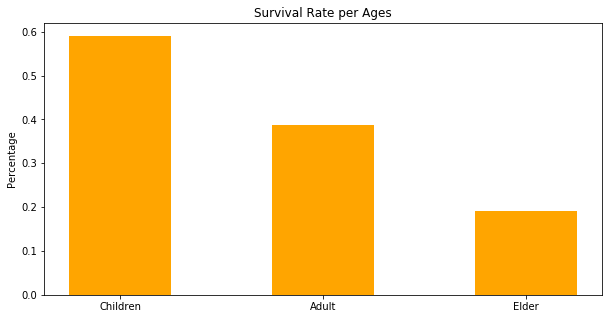

Children survival rate: 0.59
Adults survival rate: 0.39
Elders survival rate: 0.19


In [22]:
total_children = df_train[df_train['Age']<=15].count()[0]
surv_children = df_train[(df_train['Age']<=15) & (df_train['Survived']==1)].count()[0]
children_surv_per = surv_children/total_children

total_adults = df_train[(df_train['Age']>15) & (df_train['Age']<=60)].count()[0]
surv_adults = df_train[(df_train['Age']>15) & (df_train['Age']<=60) & (df_train['Survived']==1)].count()[0]
adults_surv_per = surv_adults/total_adults

total_elders = df_train[df_train['Age']>60].count()[0]
surv_elders = df_train[(df_train['Age']>60) & (df_train['Survived']==1)].count()[0]
elders_surv_per = surv_elders/total_elders 

# Bar Graph configuration
plt.figure(figsize=(10, 5))
plt.bar(['Children'], children_surv_per, width=0.5, color='orange')
plt.bar(['Adult'], adults_surv_per, width=0.5, color='orange')
plt.bar(['Elder'], elders_surv_per , width=0.5, color='orange')

plt.title('Survival Rate per Ages')
plt.ylabel('Percentage')

plt.show()

print(f'Children survival rate: {round(children_surv_per,2)}')
print(f'Adults survival rate: {round(adults_surv_per,2)}')
print(f'Elders survival rate: {round(elders_surv_per,2)}')

Children have highest survival rate. It's curious that the rate of difference between each age group be a constant, exactly 0.2 of difference. Thanks to this, we can group our ages dataset more confident on this three groups who share a proportional rate between there.

In [23]:
# Unify the type of data on Age column
def define_age(x):
    '''
    Children == 0
    Adult == 1
    Elder == 2
    '''
    if x <= 15:
        return 0
    elif x <=60:
        return 1
    else:
        return 2
    
df_train['Age'] = df_train['Age'].apply(lambda x : int(define_age(x)))

In [24]:
# Finally our dataset is already clean and unify according with our hypothesis.
df_train[0:10]

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamMem
0,1,0,3,0,1,0,1
1,2,1,1,1,1,1,1
2,3,1,3,1,1,0,0
3,4,1,1,1,1,0,1
4,5,0,3,0,1,0,0
6,7,0,1,0,1,0,0
7,8,0,3,0,0,0,4
8,9,1,3,1,1,0,2
9,10,1,2,1,0,1,1
10,11,1,3,1,0,0,2


In [25]:
df_train.to_csv('./train_master_table.csv')